## Step 0: Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Step 1: Read Data

In [2]:
df_original=pd.read_csv('tour_package.csv')
df=pd.read_csv('tour_package.csv')

In [3]:
df.head(3)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   

    Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0     Salaried  Female                       3                3.0   
1     Salaried    Male                       3                4.0   
2  Free Lancer    Male                       3                4.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0

## Step 2: Clean Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4822.000000    4655.000000  
mean                   1.187267   23619.853491  
std                    0.857861    5380.698361  
min                    0.000000    1000.000000  
25%                    1.000000   20346.000000  
50%                    1.000000   22347.000000  
75%                    2.000000   25571.000000  
max                    3.000000   98678.000000

In [6]:
df_original=df_original.drop(columns="CustomerID")

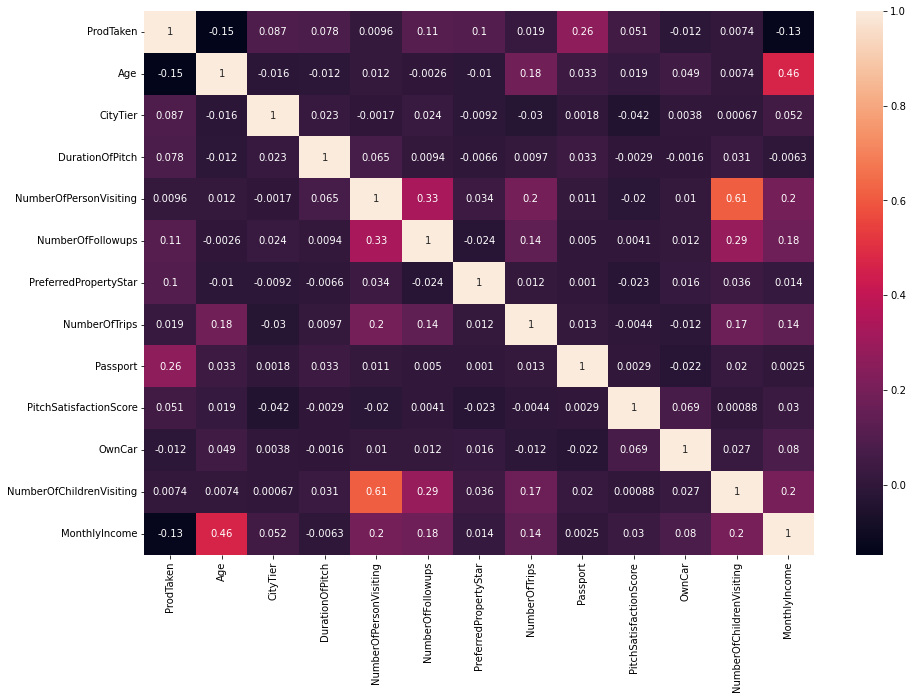

In [7]:
## Heat Map Correlation on original un-clean data
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_original.corr(),annot=True)
plt.show()

In [8]:
df=df.drop(columns="CustomerID")

In [9]:
round(df.describe(exclude='number'))

TypeofContact Occupation Gender ProductPitched MaritalStatus  \
count           4863       4888   4888           4888          4888   
unique             2          4      3              5             4   
top     Self Enquiry   Salaried   Male          Basic       Married   
freq            3444       2368   2916           1842          2340   

       Designation  
count         4888  
unique           5  
top      Executive  
freq          1842

In [10]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [11]:
df.Gender=df.Gender.replace('Fe Male','Female')

In [12]:
df.DurationOfPitch=df.DurationOfPitch.fillna(0)

In [13]:
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [14]:
## missing values handling
x=df.TypeofContact.mode()
x

0    Self Enquiry
dtype: object

In [15]:
df.TypeofContact=df.TypeofContact.fillna('Self Enquiry')

In [16]:
df['NumberOfFollowups']=df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [17]:
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [18]:
df["NumberOfTrips"] = df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

In [19]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [20]:
# Impute missing Age with median value
df["Age"] = df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

In [21]:
df["MonthlyIncome"]=df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [22]:
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

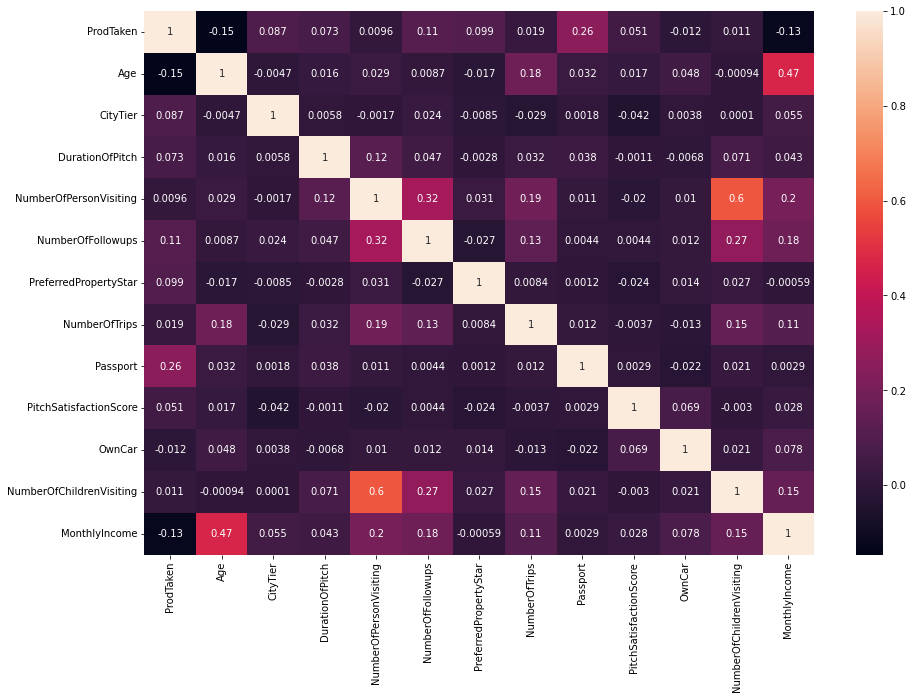

In [23]:
## HeatMap after cleaning
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
#Data based on customer profile only
df_profile=df.drop(['TypeofContact','DurationOfPitch','NumberOfFollowups','PitchSatisfactionScore'],axis=1)

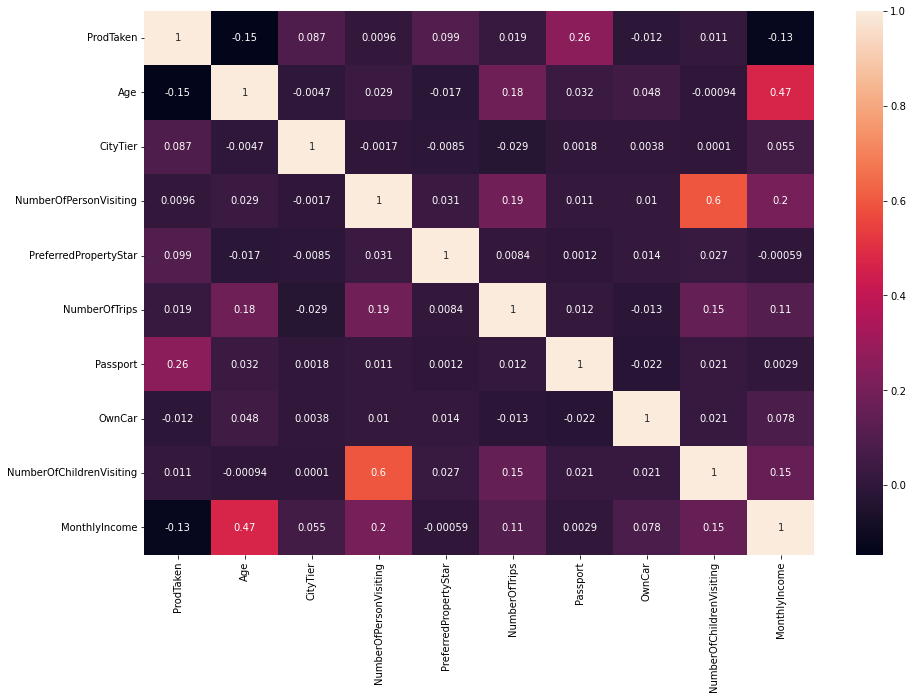

In [25]:
# Heatmap based on customer profile
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_profile.corr(),annot=True)
plt.show()

## Binning data

In [26]:
#need to bin age,numberofpeople visiting, number of trips,monthly income

In [27]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   CityTier                  4888 non-null   int64  
 3   Occupation                4888 non-null   object 
 4   Gender                    4888 non-null   object 
 5   NumberOfPersonVisiting    4888 non-null   int64  
 6   ProductPitched            4888 non-null   object 
 7   PreferredPropertyStar     4888 non-null   float64
 8   MaritalStatus             4888 non-null   object 
 9   NumberOfTrips             4888 non-null   float64
 10  Passport                  4888 non-null   int64  
 11  OwnCar                    4888 non-null   int64  
 12  NumberOfChildrenVisiting  4888 non-null   float64
 13  Designation               4888 non-null   object 
 14  MonthlyI

In [28]:

df.NumberOfTrips.unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., 20., 22.])

In [29]:
df_binned=df_profile.drop(["Age","MonthlyIncome","NumberOfTrips"],axis=1)

In [30]:
df_binned['NumberOfTrips'] = pd.cut(df['NumberOfTrips'], bins = [0,5,10, 15, 20,25], labels = ['<5', '6-10', '11-15', '16-20','21-25'])

In [31]:
df_binned['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [32]:
df_binned['Agebin'] = pd.cut(df['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

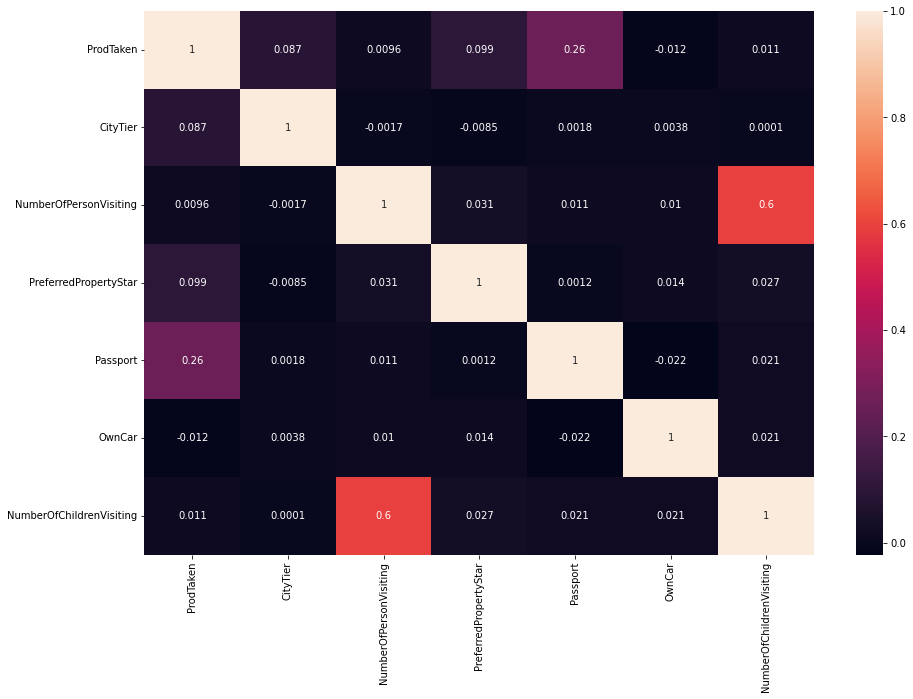

In [33]:
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(15,10))
sns.heatmap(df_binned.corr(),annot=True)
plt.show()

## Step 3: EDA

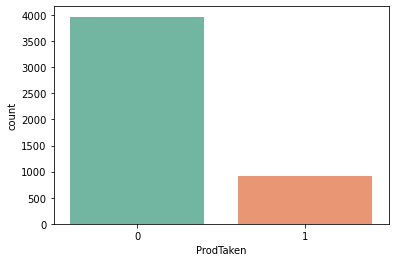

In [34]:

count_prodTaken=sns.countplot(data=df,x="ProdTaken",palette="Set2")

In [35]:
df_bought=df[df.ProdTaken==1]

In [36]:
df_bought.Gender.value_counts()

Male      578
Female    342
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

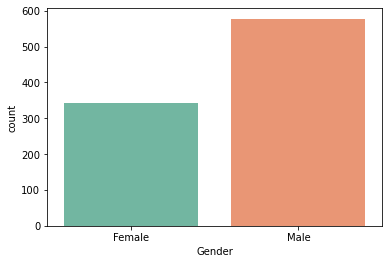

In [37]:
sns.countplot(data=df_bought,x="Gender",palette="Set2")

<AxesSubplot:xlabel='Agebin', ylabel='count'>

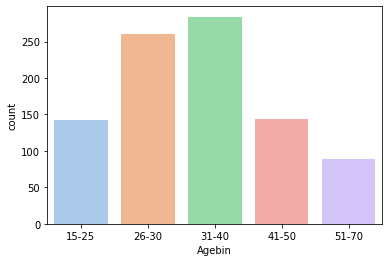

In [38]:


sns.countplot(data=df_binned[df_binned.ProdTaken==1],x="Agebin")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

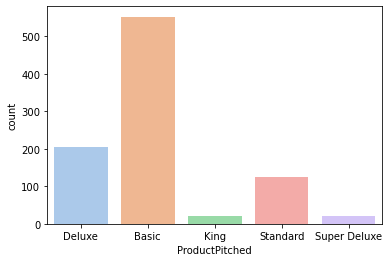

In [39]:
sns.countplot(data=df_bought,x="ProductPitched")

In [40]:
df_bought.ProductPitched.value_counts()

Basic           552
Deluxe          204
Standard        124
King             20
Super Deluxe     20
Name: ProductPitched, dtype: int64

In [41]:
temp=df[df.ProdTaken==0]
temp.ProductPitched.value_counts()

Deluxe          1528
Basic           1290
Standard         618
Super Deluxe     322
King             210
Name: ProductPitched, dtype: int64

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

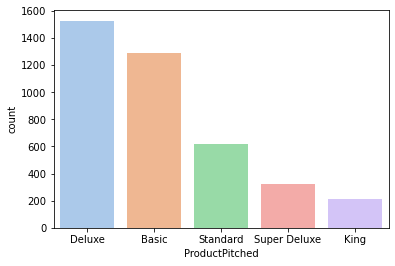

In [42]:
sns.countplot(data=temp,x="ProductPitched")

In [43]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Step 4: Model Building

In [44]:
def prepare_data(df):
    X = df.drop(['ProdTaken'],axis=1)
    X = pd.get_dummies(X)
    y = df['ProdTaken']
    
    return X,y

In [45]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
    return score_list # returning the list with train and test scores

In [46]:
clf = DecisionTreeClassifier()

In [47]:
df.head(1)

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch Occupation  \
0          1  41.0  Self Enquiry         3              6.0   Salaried   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0  Female                       3                3.0         Deluxe   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
0                    3.0        Single            1.0         1   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
0                       2       1                       0.0     Manager   

   MonthlyIncome  
0        20993.0

## Clean data Decision tree

In [56]:
X,y=prepare_data(df)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3421, 34), (1467, 34))

In [58]:
# Train Decision Tree Classifer

clf=clf.fit(X_train,y_train)
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1191
           1       0.71      0.72      0.72       276

    accuracy                           0.89      1467
   macro avg       0.82      0.83      0.83      1467
weighted avg       0.89      0.89      0.89      1467



In [60]:
print(confusion_matrix(y_test,y_pred))

[[1111   80]
 [  77  199]]


In [61]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [62]:
accuracy_score(y_test,y_pred) ##blues

0.8929788684389911

/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


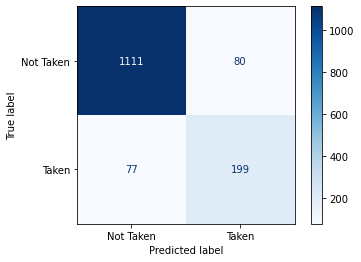

In [64]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [65]:
get_metrics_score(clf,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score              1.0       0.892979           1.0     0.721014   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score               1.0        0.713262             1.0       0.717117

[1.0,
 0.8929788684389911,
 1.0,
 0.7210144927536232,
 1.0,
 0.7132616487455197,
 1.0,
 0.7171171171171171]

# Over Sample (SMOTE) and test

In [86]:
over = SMOTE(sampling_strategy=0.3)
X,y=prepare_data(df)
X,y= over.fit_resample(X, y)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

## Decision Tree

In [88]:
# Train Decision Tree Classifer

clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1191
           1       0.75      0.76      0.75       357

    accuracy                           0.89      1548
   macro avg       0.84      0.84      0.84      1548
weighted avg       0.89      0.89      0.89      1548

[[1099   92]
 [  85  272]]
1.0
0.8856589147286822


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


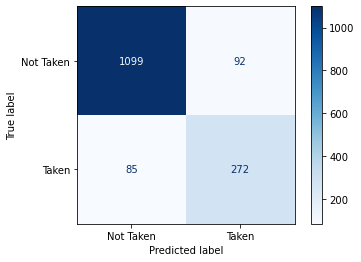

In [89]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [90]:
get_metrics_score(clf,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score              1.0       0.885659           1.0     0.761905   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score               1.0        0.747253             1.0       0.754508

[1.0,
 0.8856589147286822,
 1.0,
 0.7619047619047619,
 1.0,
 0.7472527472527473,
 1.0,
 0.7545076282940361]

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clrf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clrf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1191
           1       0.75      0.76      0.75       357

    accuracy                           0.89      1548
   macro avg       0.84      0.84      0.84      1548
weighted avg       0.89      0.89      0.89      1548

[[1099   92]
 [  85  272]]
1.0
0.8856589147286822


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


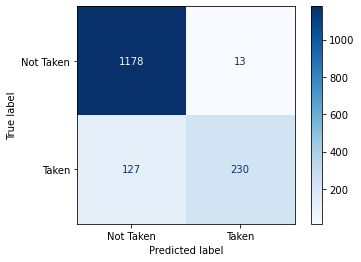

In [92]:
plot_confusion_matrix(clrf, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [93]:
get_metrics_score(clrf,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score              1.0       0.909561           1.0     0.644258   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score               1.0        0.946502             1.0       0.766667

[1.0,
 0.9095607235142119,
 1.0,
 0.6442577030812325,
 1.0,
 0.9465020576131687,
 1.0,
 0.7666666666666666]

## XGBoost

In [94]:
from sklearn.ensemble import GradientBoostingClassifier


xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)


y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1191
           1       0.87      0.54      0.67       357

    accuracy                           0.88      1548
   macro avg       0.88      0.76      0.80      1548
weighted avg       0.88      0.88      0.87      1548

[[1163   28]
 [ 163  194]]
1.0
0.8766149870801033


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


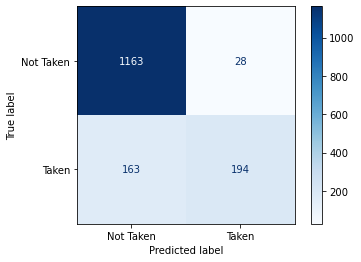

In [95]:
plot_confusion_matrix(xgb, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [96]:
get_metrics_score(xgb,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score         0.886427       0.876615      0.571429     0.543417   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score          0.899811        0.873874        0.698972       0.670121

[0.8864265927977839,
 0.8766149870801033,
 0.5714285714285714,
 0.5434173669467787,
 0.8998109640831758,
 0.8738738738738738,
 0.6989720998531572,
 0.6701208981001727]

## AdaBoost 

In [97]:
from sklearn.ensemble import AdaBoostClassifier

ada =AdaBoostClassifier()
ada.fit(X_train,y_train)


y_pred = ada.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1191
           1       0.73      0.46      0.56       357

    accuracy                           0.84      1548
   macro avg       0.79      0.70      0.73      1548
weighted avg       0.82      0.84      0.82      1548

[[1129   62]
 [ 193  164]]
1.0
0.8352713178294574


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


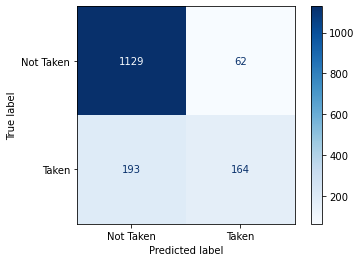

In [98]:
plot_confusion_matrix(ada, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [99]:
get_metrics_score(ada,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score         0.834349       0.835271      0.440576     0.459384   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score          0.735471        0.725664        0.551051       0.562607

[0.8343490304709141,
 0.8352713178294574,
 0.44057623049219685,
 0.45938375350140054,
 0.7354709418837675,
 0.7256637168141593,
 0.5510510510510511,
 0.562607204116638]

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear')

lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1191
           1       0.85      0.05      0.09       357

    accuracy                           0.78      1548
   macro avg       0.81      0.52      0.48      1548
weighted avg       0.79      0.78      0.69      1548

[[1188    3]
 [ 340   17]]
1.0
0.7784237726098191


# Over Sampling (oversampler) and test

In [101]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy=0.3)
X,y=prepare_data(df)
# fit and apply the transform
X, y = over.fit_resample(X, y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

## Decision Tree

In [103]:
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1191
           1       0.78      0.84      0.81       357

    accuracy                           0.91      1548
   macro avg       0.86      0.88      0.87      1548
weighted avg       0.91      0.91      0.91      1548

[[1105   86]
 [  58  299]]
1.0
0.9069767441860465


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


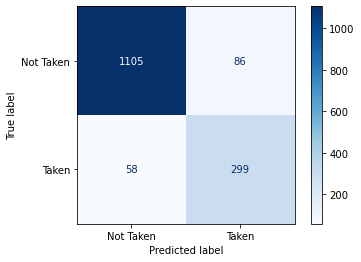

In [104]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [105]:
get_metrics_score(clf,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score              1.0       0.906977           1.0     0.837535   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score               1.0        0.776623             1.0        0.80593

[1.0,
 0.9069767441860465,
 1.0,
 0.8375350140056023,
 1.0,
 0.7766233766233767,
 1.0,
 0.8059299191374664]

## Random Forest

In [106]:
clrf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1191
           1       0.78      0.84      0.81       357

    accuracy                           0.91      1548
   macro avg       0.86      0.88      0.87      1548
weighted avg       0.91      0.91      0.91      1548

[[1105   86]
 [  58  299]]
1.0
0.9069767441860465


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


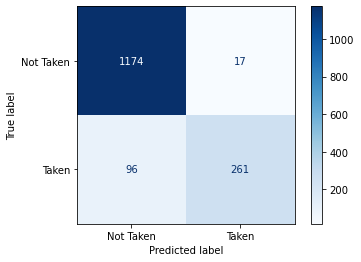

In [109]:
plot_confusion_matrix(clrf, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

In [110]:
get_metrics_score(clrf,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score              1.0       0.927003           1.0     0.731092   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score               1.0        0.938849             1.0       0.822047

[1.0,
 0.9270025839793282,
 1.0,
 0.7310924369747899,
 1.0,
 0.9388489208633094,
 1.0,
 0.8220472440944883]

## XGBoost

In [111]:
xgb.fit(X_train,y_train)


y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1191
           1       0.82      0.50      0.62       357

    accuracy                           0.86      1548
   macro avg       0.84      0.73      0.77      1548
weighted avg       0.85      0.86      0.85      1548

[[1151   40]
 [ 179  178]]
1.0
0.8585271317829457


In [113]:
get_metrics_score(xgb,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score         0.877008       0.858527      0.552221     0.498599   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.86629        0.816514        0.674487        0.61913

[0.8770083102493075,
 0.8585271317829457,
 0.5522208883553421,
 0.49859943977591037,
 0.8662900188323918,
 0.8165137614678899,
 0.6744868035190617,
 0.6191304347826087]

/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


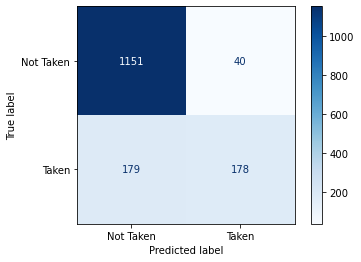

In [114]:
plot_confusion_matrix(xgb, X_test, y_test,display_labels=["Not Taken","Taken"],cmap="Blues")  
plt.show()

## AdaBoost

In [115]:
ada.fit(X_train,y_train)


y_pred = ada.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1191
           1       0.73      0.45      0.56       357

    accuracy                           0.83      1548
   macro avg       0.79      0.70      0.73      1548
weighted avg       0.82      0.83      0.82      1548

[[1130   61]
 [ 196  161]]
1.0
0.8339793281653747


In [118]:
get_metrics_score(ada,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score         0.831579       0.833979      0.440576      0.45098   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score          0.721022        0.725225        0.546945       0.556131

[0.8315789473684211,
 0.8339793281653747,
 0.44057623049219685,
 0.45098039215686275,
 0.7210216110019646,
 0.7252252252252253,
 0.5469448584202683,
 0.5561312607944732]

## Logistic Regression

In [117]:
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1191
           1       0.86      0.13      0.23       357

    accuracy                           0.80      1548
   macro avg       0.83      0.56      0.56      1548
weighted avg       0.81      0.80      0.73      1548

[[1183    8]
 [ 309   48]]
1.0
0.7952196382428941


In [119]:
get_metrics_score(lg,X_train,X_test,y_train,y_test)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score         0.796122        0.79522      0.130852     0.134454   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score          0.900826        0.857143        0.228512       0.232446

[0.7961218836565097,
 0.7952196382428941,
 0.13085234093637454,
 0.13445378151260504,
 0.9008264462809917,
 0.8571428571428571,
 0.22851153039832287,
 0.23244552058111378]

## Retest after selection

In [ ]:
X,y=prepare_data(df_profile)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
X_train.shape, X_test.shape

## (Profile) Decision Tree

In [ ]:
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_train, clf.predict(X_train))

In [ ]:
accuracy_score(y_train, clf.predict(X_train))

In [ ]:
accuracy_score(y_test,y_pred)

## (Profile) Over Sample (SMOTE) and test

In [ ]:
over = SMOTE(sampling_strategy=0.3)
X,y=prepare_data(df_profile)
X,y= over.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

## (Profile) Decision Tree

In [ ]:
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clrf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clrf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))


## (Profile) AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada =AdaBoostClassifier()
ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear')

lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) Over Sampling (oversampler) and test

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy=0.3)
X,y=prepare_data(df_profile)
# fit and apply the transform
X, y = over.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

## (Profile) Decision Tree

In [ ]:
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) Random Forest

In [ ]:
clrf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) XGBoost

In [ ]:
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) AdaBoost

In [ ]:
ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))

## (Profile) Logistic Regression

In [ ]:
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test,y_pred))



## Profile data Decision Tree

In [ ]:
X,y=prepare_data(df_profile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
accuracy_score(y_train, clf.predict(X_train))


In [ ]:
accuracy_score(y_test,y_pred)

## Binned Profile Data Decision Tree

In [ ]:
df_binned.info()

In [ ]:
#test binned
X,y=prepare_data(df_binned)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
accuracy_score(y_train, clf.predict(X_train))

In [ ]:
accuracy_score(y_test,y_pred)

## Binned Profile Data Feature Selection

In [ ]:
## Feature selecting categorical data

def feature_select(df):

# retrieve numpy array
    dataset = df.values
# split into input (X) and output (y) variables
    X = dataset[:, 1:]
    y = dataset[:,1]
# format all fields as string
    X = X.astype(str)
    y = y.astype(str)
    
    return X, y


In [ ]:
X,y=feature_select(df_binned)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
df_binned.head(1)

In [ ]:
X[0:1]

## Binned Profile data, feature selection, Decision Tree

In [ ]:

clf = clf.fit(X_train_fs, y_train_enc)

#Predict the response for test dataset
y_pred = clf.predict(X_test_fs)


print(classification_report(y_test_enc,y_pred))
print(confusion_matrix(y_test_enc,y_pred))

In [ ]:
accuracy_score(y_train_enc, clf.predict(X_train_fs))

In [ ]:
accuracy_score(y_test_enc,y_pred)